In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel(r"SupermarketSalesBlank.xlsx")

print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line      Payment  Unit price  Quantity   Tax 5%  \
0       Health and beauty      Ewallet       74.69         7  26.1415   
1  Electronic accessories         Cash       15.28         5   3.8200   
2      Home and lifestyle  Credit card       46.33         7  16.2155   
3       Health and beauty      Ewallet       58.22         8  23.2880   
4       Sports and travel      Ewallet       86.31         7  30.2085   

      Total                 Date      Time    cogs  gross margin percentage  \
0  548.9715  2019-05-01 00:00:00  13:08:00  522.83                 4.761905   
1   80.2200  2019-08-03 00:00:00  10:29:00   76.40    

In [55]:
G_options = df['Gender'].unique().tolist()
print(G_options)

['Female', 'Male']


In [56]:
print(len(df['Gender'].unique()))

2


In [57]:
Gdist = df.groupby(['Gender']).size()
Gdist.reset_index(name='Count')

,Gender,Count
0,Female,501
1,Male,499


In [58]:
print(Gdist)

Gender
Female    501
Male      499
dtype: int64


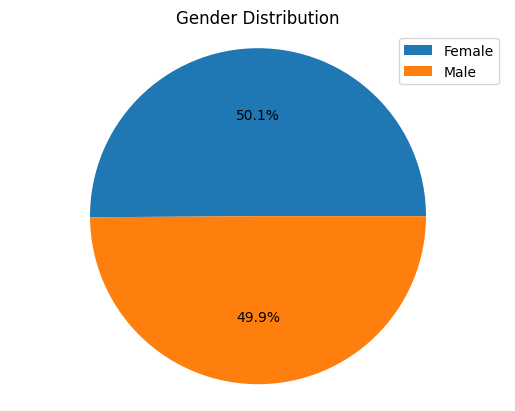

In [59]:
plt.pie(Gdist, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.axis('equal')
plt.legend(labels=G_options)
plt.show()


                           Total                       
Branch                         A          B           C
Customer type Gender                                   
Member        Female  26643.0675  26850.432  34653.4440
              Male    26994.4080  26854.254  22227.8385
Normal        Female  26626.0995  26077.863  27032.0190
              Male    25936.7955  26415.123  26655.4050


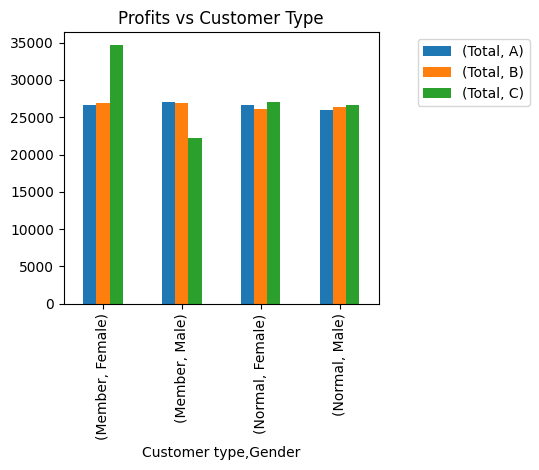

In [60]:
df_pt1 = df.pivot_table(index=['Customer type','Gender'],columns= ['Branch'], values=['Total'], aggfunc='sum')
print(df_pt1)
ax = df_pt1.plot(kind = 'bar', stacked = False, title = 'Profits vs Customer Type')
ax.legend(loc = 'upper right',bbox_to_anchor=(1.5, 1.0))
#for branch in range(len(df['Branch'].unique())):
  #ax.bar_label(ax.containers[branch], label_type='edge')
plt.tight_layout()
plt.show()


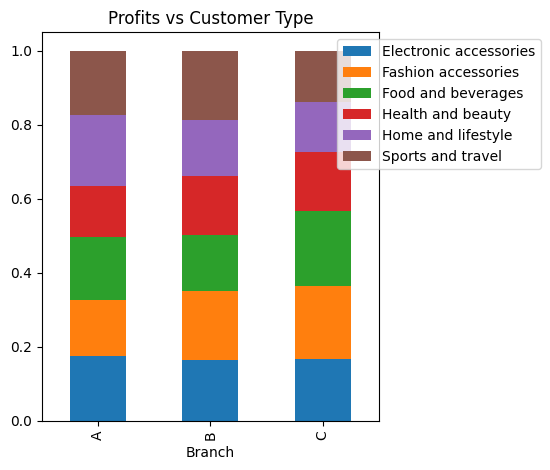

In [61]:
df_grouped = df.groupby('Branch')['Product line'].value_counts(normalize=True).unstack('Product line')
ax = df_grouped.plot(kind = 'bar', stacked = True, title = 'Profits vs Customer Type')
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))
#for branch in range(len(df['Branch'].unique())):
  #ax.bar_label(ax.containers[branch], label_type='edge')
plt.tight_layout()
plt.show()

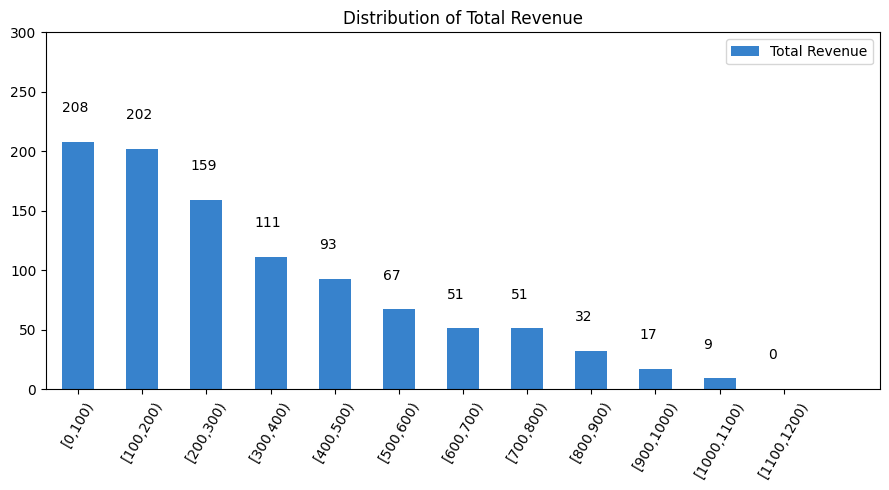

In [66]:
def plot_histogram():

    Plist = df['Total']
    bins = np.arange(0,1300,100)

    fig, ax = plt.subplots(figsize=(9, 5))
    _, bins, patches = plt.hist([np.clip(Plist, bins[0], bins[-1])],
                                # normed=1,  # normed is deprecated; replace with density
                                density=False,
                                bins=bins, color=['#3782CC'], rwidth= 0.5, label=['Total Revenue'])

    xlabels = bins[1:].astype(str)
    xlabels[-1] += '+'

    lablist = []
    for i in range(len(bins)-1):
        label = '[' + str(round(bins[i])) + ',' + str(round(bins[i+1])) + ')'
        lablist.append(label)
    #lablist[-1] += '+'
    N_labels = len(lablist)
    plt.xlim([0, 1300])
    plt.ylim([0, 300])
    plt.xticks(100 * np.arange(N_labels) + 50)
    plt.xticks(rotation = 60)
    #plt.axvline(x = 400, color = 'red', linestyle = 'dashed', linewidth = 0.5)
    #plt.axvline(x=700, color = 'red', linestyle = 'dashed', linewidth = 0.5)
    #plt.axvline(x=1000, color = 'red', linestyle = 'dashed', linewidth = 0.5)
    ax.set_xticklabels(lablist)

    for pp in patches:
        x = pp._x0
        y = pp._y0
        plt.text(x,pp._height+25,round(pp._height))

    #plt.yticks([])
    plt.title('Distribution of Total Revenue')
    plt.setp(patches, linewidth=0)
    plt.legend(loc='upper right')

    fig.tight_layout()

    plt.show()
plot_histogram()